In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip

%matplotlib inline

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')

get_ipython().magic(u"config InlineBackend.figure_formats = 'png', ")

mpl.rcParams['figure.figsize'] = (5.0, 5.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.scatterpoints'] = 1
mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})


In [2]:
from common_plots import *

In [3]:
# Extract dataframes from binary
store = pd.HDFStore("points_MICRO_SCAN_I42_NTv482_HBv421_REDUCED_3_02_Nov_15_1041.h5")
# df_orig = store.full12loop_all
df_pass_all = store.full12loop_good_posMuMagMom_planckUpperOnly #'relaxed' constraints - +ve g-2 and omegah^2
store.close()

In [4]:
# Make subsets based on masses, and passing ALL NMSSMTools constraints (i.e. don't ignore g-2 and relic density)
from make_hdf5 import subset_var
df_pass_all_h1 = subset_var(df_pass_all, 122.1, 128.1, 'mh1')
df_pass_all_h2 = subset_var(df_pass_all, 122.1, 128.1, 'mh2')
df_pass_all_strict = df_pass_all[df_pass_all.constraints == ""]
df_pass_all_strict_ma1Lt10 = df_pass_all_strict[df_pass_all_strict.ma1 <10]

In [5]:
# print 'Original points (no constraints):', len(df_orig.index) 
print 'With relaxed constraints (on g-2, relic density & some LHC constraints):', len(df_pass_all.index)
print 'Strictly enforcing all constraints in NMSSMTools 4.8.2:',len(df_pass_all_strict.index)
print 'Strictly enforcing all constraints in NMSSMTools 4.8.2 with ma1 < 10:',len(df_pass_all_strict_ma1Lt10.index)

With relaxed constraints (on g-2, relic density & some LHC constraints): 696190
Strictly enforcing all constraints in NMSSMTools 4.8.2: 4638
Strictly enforcing all constraints in NMSSMTools 4.8.2 with ma1 < 10: 521


## Testing ATLAS assumptions

The assumptions made in the ATLAS paper is that:

1) $a$ only decays to $\tau\tau$ and $\mu\mu$, i.e. $BR(a\to\tau\tau) + BR(a\to\mu\mu) = 1$

2) The width to each channel is related by:

\begin{equation}
\frac{\Gamma(a\to\mu\mu)}{\Gamma(a\to\tau\tau)} = \frac{m_{\mu}^2}{m_{\tau}^2\sqrt{1-(2m_{\tau}/m_{a})^2}}
\end{equation}

3) Therefore the values of $BR(a\to\tau\tau)$ and $BR(a\to\mu\mu)$ can be determined from the above

### 1) To test the assumption about $BR(a_1 \to \tau\tau)$ + $BR(a_1 \to \mu\mu)$ = 1: *FALSE*

Using the scan, we plot the values of $BR(a\to\tau\tau)$, $BR(a\to\mu\mu)$, and their sum. Can clearly see that they do *not* sum to 1.

/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/pandas/core/indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(0.7, 1)

/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


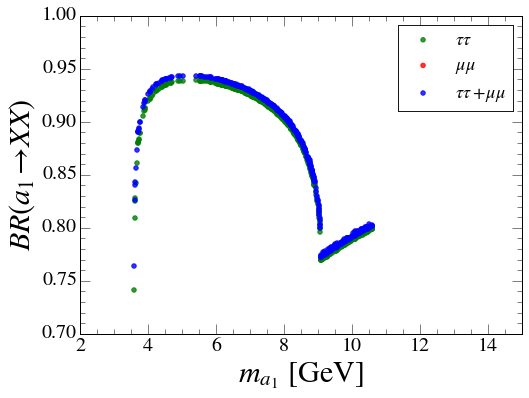

In [6]:
alp = 0.8
df_pass_all_strict.loc[:, 'Bra1tautauPlusMuMu'] = df_pass_all_strict['Bra1tautau'] + df_pass_all_strict['Bra1mumu']
plot_scatter(xvar='ma1', yvar='Bra1tautau', df=df_pass_all_strict, color='green', label=r'$\tau\tau$', alpha=alp)
plot_scatter(xvar='ma1', yvar='Bra1mumu', df=df_pass_all_strict, color='red', label=r'$\mu\mu$', alpha=alp, ax=plt.gca())
plot_scatter(xvar='ma1', yvar='Bra1tautauPlusMuMu', df=df_pass_all_strict, color='blue', label=r'$\tau\tau + \mu\mu$', alpha=alp, ax=plt.gca())
plt.xlabel(r'$m_{a_1}\mathrm{\ [GeV]}$')
plt.ylabel(r'$BR(a_1 \to XX)$')
plt.legend(loc=0, fontsize=18, framealpha=0.9)
plt.xlim(2, 15)
# plt.yscale('log')
plt.ylim(7E-1, 1)

### 2) To test BR(a -> tautau) / BR(a -> mumu): *TRUE*

Paper claims:
\begin{equation}
\frac{\Gamma(a\to\mu\mu)}{\Gamma(a\to\tau\tau)} = \frac{m_{\mu}^2}{m_{\tau}^2\sqrt{1-(2m_{\tau}/m_{a})^2}}
\end{equation}

We can plot the ratio of BR using the scan results to compare. They agree pretty well.

In [7]:
# As according to ATLAS
m_a = np.arange(2, 40, 0.25)
m_mu = 0.106
m_tau = 1.777
mumuOverTauTau = m_mu**2 / (m_tau**2 * np.sqrt(1 - (2*m_tau/m_a)**2))
print m_a.shape
print mumuOverTauTau.shape

(152,)
(152,)


(0.003, 0.01)

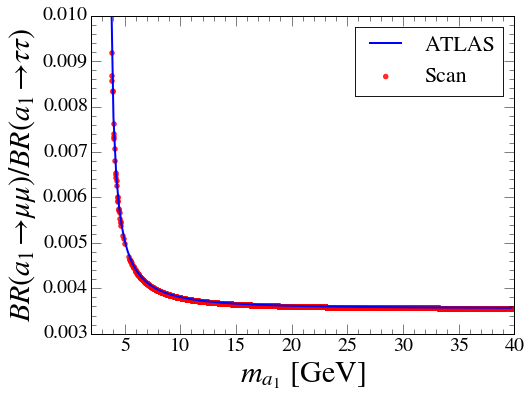

In [8]:
alp = 0.8
df_pass_all_strict.loc[:, 'Bra1MuMuOverTauTau'] =  df_pass_all_strict['Bra1mumu'] / df_pass_all_strict['Bra1tautau'] 
plot_scatter(xvar='ma1', yvar='Bra1MuMuOverTauTau', df=df_pass_all_strict, color='red', label='Scan', alpha=alp)
plt.plot(m_a, mumuOverTauTau, label=r'ATLAS', color='blue', linewidth=2)
plt.xlabel(r'$m_{a_1}\mathrm{\ [GeV]}$')
plt.ylabel(r'$BR(a_1 \to \mu\mu)/BR(a_1 \to \tau\tau)$')
plt.legend(loc=0, fontsize=22, framealpha=0.9)
plt.xlim(2, 40)
# plt.yscale('log')
plt.ylim(0.003, 0.01)

### 3) Values of BR(a -> tau tau), BR(a -> mumu): *Not Really True*

Using the formula above, and BR(tautatu) + BR(mumu) = 1:

Let:
\begin{equation}
t \equiv BR(a \to \tau\tau)
\\
m \equiv BR(a \to \mu\mu)
\\
k \equiv \frac{\Gamma(a\to\mu\mu)}{\Gamma(a\to\tau\tau)} \mathrm{\ as\ above}
\end{equation}


Then:
\begin{equation}
t + m = 1
\\
m/t = k \to m = tk, t = m/k
\\
t = 1/(1+k)
\\
m = k/(1+k)
\end{equation}

We can therefore plot the values of each BR. We will see that they do not agree very well, especially above the $b\bar{b}$ threshold.

In [9]:
Brtautau_atlas = 1 / (1 + mumuOverTauTau)
Brmumu_atlas = mumuOverTauTau / (1 + mumuOverTauTau)

(0, 1.1)

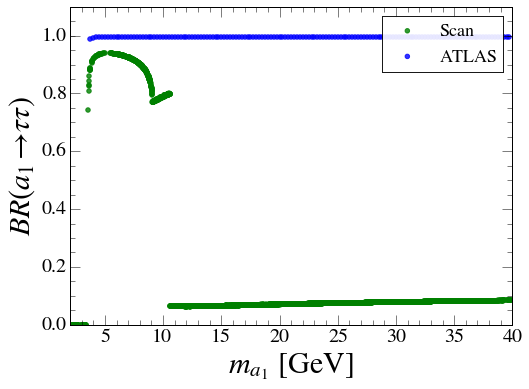

In [10]:
alp = 0.8
plot_scatter(xvar='ma1', yvar='Bra1tautau', df=df_pass_all_strict, color='green', label='Scan', alpha=alp)
plot_scatter(xarray=m_a, yarray=Brtautau_atlas, color='blue', label=r'ATLAS', alpha=alp, ax=plt.gca())
plt.xlabel(r'$m_{a_1}\mathrm{\ [GeV]}$')
plt.ylabel(r'$BR(a_1 \to \tau\tau)$')
plt.legend(loc=0, fontsize=18, framealpha=0.9)
plt.xlim(2, 40)
# plt.yscale('log')
plt.ylim(0, 1.1)

(0.0002, 0.02)

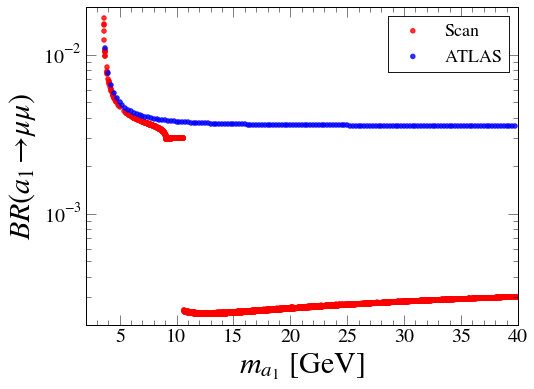

In [11]:
alp = 0.8
plot_scatter(xvar='ma1', yvar='Bra1mumu', df=df_pass_all_strict, color='red', label='Scan', alpha=alp)
plot_scatter(xarray=m_a, yarray=Brmumu_atlas, color='blue', label=r'ATLAS', alpha=alp, ax=plt.gca())
plt.xlabel(r'$m_{a_1}\mathrm{\ [GeV]}$')
plt.ylabel(r'$BR(a_1 \to \mu\mu)$')
plt.legend(loc=0, fontsize=18, framealpha=0.9)
plt.xlim(2, 40)
plt.yscale('log')
plt.ylim(0.0002, 0.02)
# plt.xscale('log')

## Conclusion

The assumption about the **ratio** of BR is correct.

The asumption about the absolute values of the BR are **incorrectly** (mostly). 

So what are the implications:

- the relative rates of $a\to\mu\mu$ and $a\to\tau\tau$ when generating MC are correct

- the interpretation of the limit might need some care?